In [6]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import requests
import gmaps
import os

# Import API key
from api_keys import g_key

#Import cleaned and merged data frame 
from data_extraction import drought_data

In [7]:
drought_df = drought_data()
drought_df

,FIPS,releaseDate,NONE,D0,D1,D2,D3,D4,Level,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,1001,2000-01-31,0.000,25.000,75.000,0.000,0.0,0.0,1.75000,594.446,9.942,32.532237,-86.646440
1,1001,2000-02-29,0.000,100.000,0.000,0.000,0.0,0.0,1.00000,594.446,9.942,32.532237,-86.646440
2,1001,2000-03-31,0.000,68.145,31.855,0.000,0.0,0.0,1.31855,594.446,9.942,32.532237,-86.646440
3,1001,2000-04-30,1.775,98.225,0.000,0.000,0.0,0.0,0.98225,594.446,9.942,32.532237,-86.646440
4,1001,2000-05-31,0.000,19.048,78.608,2.344,0.0,0.0,1.83296,594.446,9.942,32.532237,-86.646440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
652234,72153,2016-07-31,100.000,0.000,0.000,0.000,0.0,0.0,0.00000,67.711,0.628,18.085669,-66.857901
652235,72153,2016-08-31,100.000,0.000,0.000,0.000,0.0,0.0,0.00000,67.711,0.628,18.085669,-66.857901
652236,72153,2016-09-30,100.000,0.000,0.000,0.000,0.0,0.0,0.00000,67.711,0.628,18.085669,-66.857901
652237,72153,2016-10-31,100.000,0.000,0.000,0.000,0.0,0.0,0.00000,67.711,0.628,18.085669,-66.857901


In [8]:
#Number of counties in our data. 
drought_df["FIPS"].nunique()


3213

In [10]:
#Rename Longitude columns 
drought_df = drought_df.rename(columns={'INTPTLAT': 'Lat', 'INTPTLONG                                                                                                               ': 'Lng'})
drought_df.head()

,FIPS,releaseDate,NONE,D0,D1,D2,D3,D4,Level,ALAND_SQMI,AWATER_SQMI,Lat,Lng
0,1001,2000-01-31,0.000,25.000,75.000,0.000,0.0,0.0,1.75000,594.446,9.942,32.532237,-86.64644
1,1001,2000-02-29,0.000,100.000,0.000,0.000,0.0,0.0,1.00000,594.446,9.942,32.532237,-86.64644
2,1001,2000-03-31,0.000,68.145,31.855,0.000,0.0,0.0,1.31855,594.446,9.942,32.532237,-86.64644
3,1001,2000-04-30,1.775,98.225,0.000,0.000,0.0,0.0,0.98225,594.446,9.942,32.532237,-86.64644
4,1001,2000-05-31,0.000,19.048,78.608,2.344,0.0,0.0,1.83296,594.446,9.942,32.532237,-86.64644


In [18]:
#Counties with NO Drougth" 
level_zero = drought_df.loc[drought_df["Level"] == 0]
level_zero.reset_index(drop=True, inplace=True)
level_zero

,FIPS,releaseDate,NONE,D0,D1,D2,D3,D4,Level,ALAND_SQMI,AWATER_SQMI,Lat,Lng
0,1001,2001-03-31,100.0,0.0,0.0,0.0,0.0,0.0,0.0,594.446,9.942,32.532237,-86.646440
1,1001,2001-04-30,100.0,0.0,0.0,0.0,0.0,0.0,0.0,594.446,9.942,32.532237,-86.646440
2,1001,2001-05-31,100.0,0.0,0.0,0.0,0.0,0.0,0.0,594.446,9.942,32.532237,-86.646440
3,1001,2001-06-30,100.0,0.0,0.0,0.0,0.0,0.0,0.0,594.446,9.942,32.532237,-86.646440
4,1001,2001-07-31,100.0,0.0,0.0,0.0,0.0,0.0,0.0,594.446,9.942,32.532237,-86.646440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305543,72153,2016-07-31,100.0,0.0,0.0,0.0,0.0,0.0,0.0,67.711,0.628,18.085669,-66.857901
305544,72153,2016-08-31,100.0,0.0,0.0,0.0,0.0,0.0,0.0,67.711,0.628,18.085669,-66.857901
305545,72153,2016-09-30,100.0,0.0,0.0,0.0,0.0,0.0,0.0,67.711,0.628,18.085669,-66.857901
305546,72153,2016-10-31,100.0,0.0,0.0,0.0,0.0,0.0,0.0,67.711,0.628,18.085669,-66.857901


In [19]:
#Counties with Level 1" 
level_one = drought_df.loc[drought_df["Level"].between(1, 1.99)]
level_one.reset_index(drop=True, inplace=True)
level_one

,FIPS,releaseDate,NONE,D0,D1,D2,D3,D4,Level,ALAND_SQMI,AWATER_SQMI,Lat,Lng
0,1001,2000-01-31,0.0000,25.0000,75.0000,0.0000,0.0,0.0,1.750000,594.446,9.942,32.532237,-86.646440
1,1001,2000-02-29,0.0000,100.0000,0.0000,0.0000,0.0,0.0,1.000000,594.446,9.942,32.532237,-86.646440
2,1001,2000-03-31,0.0000,68.1450,31.8550,0.0000,0.0,0.0,1.318550,594.446,9.942,32.532237,-86.646440
3,1001,2000-05-31,0.0000,19.0480,78.6080,2.3440,0.0,0.0,1.832960,594.446,9.942,32.532237,-86.646440
4,1001,2002-03-31,0.0000,100.0000,0.0000,0.0000,0.0,0.0,1.000000,594.446,9.942,32.532237,-86.646440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85187,72151,2016-02-29,22.6525,2.3475,68.5275,6.4725,0.0,0.0,1.588200,55.215,28.028,18.059858,-65.859871
85188,72153,2003-03-31,0.0000,100.0000,0.0000,0.0000,0.0,0.0,1.000000,67.711,0.628,18.085669,-66.857901
85189,72153,2007-02-28,17.6225,34.0125,48.3650,0.0000,0.0,0.0,1.307425,67.711,0.628,18.085669,-66.857901
85190,72153,2007-03-31,0.0000,3.2700,96.7300,0.0000,0.0,0.0,1.967300,67.711,0.628,18.085669,-66.857901


In [20]:
#Counties with Level 2" 
level_two = drought_df.loc[drought_df["Level"].between(2, 2.99)]
level_two.reset_index(drop=True, inplace=True)
level_two

,FIPS,releaseDate,NONE,D0,D1,D2,D3,D4,Level,ALAND_SQMI,AWATER_SQMI,Lat,Lng
0,1001,2000-06-30,0.0,0.00,24.0225,71.2475,4.73,0.0,2.807075,594.446,9.942,32.532237,-86.646440
1,1001,2001-01-31,0.0,0.00,40.5960,59.4040,0.00,0.0,2.594040,594.446,9.942,32.532237,-86.646440
2,1001,2001-02-28,0.0,0.00,100.0000,0.0000,0.00,0.0,2.000000,594.446,9.942,32.532237,-86.646440
3,1001,2002-06-30,0.0,0.00,100.0000,0.0000,0.00,0.0,2.000000,594.446,9.942,32.532237,-86.646440
4,1001,2002-09-30,0.0,12.74,64.1825,23.0775,0.00,0.0,2.103375,594.446,9.942,32.532237,-86.646440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55300,72151,2007-02-28,0.0,0.00,100.0000,0.0000,0.00,0.0,2.000000,55.215,28.028,18.059858,-65.859871
55301,72151,2007-03-31,0.0,0.00,100.0000,0.0000,0.00,0.0,2.000000,55.215,28.028,18.059858,-65.859871
55302,72151,2015-07-31,0.0,0.00,31.0625,63.7475,5.19,0.0,2.741275,55.215,28.028,18.059858,-65.859871
55303,72151,2015-12-31,0.0,0.00,88.0820,11.9180,0.00,0.0,2.119180,55.215,28.028,18.059858,-65.859871


In [21]:
#Counties with Level 3" 
level_three = drought_df.loc[drought_df["Level"].between(3, 3.99)]
level_three.reset_index(drop=True, inplace=True)
level_three

,FIPS,releaseDate,NONE,D0,D1,D2,D3,D4,Level,ALAND_SQMI,AWATER_SQMI,Lat,Lng
0,1001,2000-11-30,0.0,0.0,0.000,25.0000,75.0000,0.000,3.750000,594.446,9.942,32.532237,-86.646440
1,1001,2000-12-31,0.0,0.0,0.000,100.0000,0.0000,0.000,3.000000,594.446,9.942,32.532237,-86.646440
2,1001,2006-08-31,0.0,0.0,0.000,97.6980,2.3020,0.000,3.023020,594.446,9.942,32.532237,-86.646440
3,1001,2007-05-31,0.0,0.0,5.906,55.3300,38.7640,0.000,3.328580,594.446,9.942,32.532237,-86.646440
4,1001,2007-07-31,0.0,0.0,0.000,60.0000,22.8860,17.114,3.571140,594.446,9.942,32.532237,-86.646440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34429,72147,2016-01-31,0.0,0.0,0.000,100.0000,0.0000,0.000,3.000000,50.783,213.208,18.125418,-65.432474
34430,72151,2015-08-31,0.0,0.0,0.000,70.6450,29.3550,0.000,3.293550,55.215,28.028,18.059858,-65.859871
34431,72151,2015-09-30,0.0,0.0,0.000,67.7800,32.2200,0.000,3.322200,55.215,28.028,18.059858,-65.859871
34432,72151,2015-10-31,0.0,0.0,0.000,72.4925,27.5075,0.000,3.275075,55.215,28.028,18.059858,-65.859871


In [22]:
#Counties with Level 4" 
fire_years = drought_df.loc[drought_df["Year"].between(2000, 2016)]
level_four.reset_index(drop=True, inplace=True)
level_four

,FIPS,releaseDate,NONE,D0,D1,D2,D3,D4,Level,ALAND_SQMI,AWATER_SQMI,Lat,Lng
0,1001,2000-07-31,0.0,0.0,0.0,25.5125,31.6525,42.8350,4.173225,594.446,9.942,32.532237,-86.646440
1,1001,2000-09-30,0.0,0.0,0.0,0.0000,6.9825,93.0175,4.930175,594.446,9.942,32.532237,-86.646440
2,1001,2000-10-31,0.0,0.0,0.0,0.0000,11.1740,88.8260,4.888260,594.446,9.942,32.532237,-86.646440
3,1001,2007-09-30,0.0,0.0,0.0,0.0000,31.3500,68.6500,4.686500,594.446,9.942,32.532237,-86.646440
4,1001,2007-10-31,0.0,0.0,0.0,0.1440,5.0960,94.7600,4.946160,594.446,9.942,32.532237,-86.646440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15983,72063,2015-08-31,0.0,0.0,0.0,0.0000,100.0000,0.0000,4.000000,27.888,0.425,18.272581,-65.981177
15984,72077,2015-08-31,0.0,0.0,0.0,0.0000,100.0000,0.0000,4.000000,26.489,0.127,18.224133,-65.908542
15985,72129,2015-08-31,0.0,0.0,0.0,0.0000,100.0000,0.0000,4.000000,53.108,0.099,18.147107,-65.976167
15986,72129,2015-09-30,0.0,0.0,0.0,0.0000,100.0000,0.0000,4.000000,53.108,0.099,18.147107,-65.976167


In [24]:
#Counties with Level 4" 
level_five = drought_df.loc[drought_df["Level"]== 5]
level_five.reset_index(drop=True, inplace=True)
level_five

,FIPS,releaseDate,NONE,D0,D1,D2,D3,D4,Level,ALAND_SQMI,AWATER_SQMI,Lat,Lng
0,1001,2000-08-31,0.0,0.0,0.0,0.0,0.0,100.0,5.0,594.446,9.942,32.532237,-86.646440
1,1001,2007-12-31,0.0,0.0,0.0,0.0,0.0,100.0,5.0,594.446,9.942,32.532237,-86.646440
2,1001,2008-01-31,0.0,0.0,0.0,0.0,0.0,100.0,5.0,594.446,9.942,32.532237,-86.646440
3,1005,2000-07-31,0.0,0.0,0.0,0.0,0.0,100.0,5.0,884.876,19.639,31.870253,-85.405104
4,1005,2007-09-30,0.0,0.0,0.0,0.0,0.0,100.0,5.0,884.876,19.639,31.870253,-85.405104
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,51730,2002-08-31,0.0,0.0,0.0,0.0,0.0,100.0,5.0,22.946,0.237,37.204730,-77.392368
3317,56003,2005-03-31,0.0,0.0,0.0,0.0,0.0,100.0,5.0,3136.491,21.787,44.525117,-107.994848
3318,56027,2012-10-31,0.0,0.0,0.0,0.0,0.0,100.0,5.0,2626.028,1.919,43.062159,-104.468373
3319,56031,2002-08-31,0.0,0.0,0.0,0.0,0.0,100.0,5.0,2084.187,26.655,42.131593,-104.953963


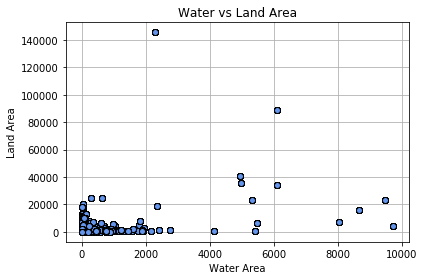

The correlation between both factors is 0.44


In [25]:
plt.title("Water vs Land Area")
plt.xlabel("Water Area")
plt.ylabel("Land Area")

x_values =  level_zero["AWATER_SQMI"]
y_values = level_zero["ALAND_SQMI"]
correlation = st.pearsonr(x_values,y_values)

# Print our chart to the screen
#Had to add linestyle='None' because I had lines connecting all my dots. Crazy. 
plt.plot(x_values, y_values,
         marker = "o", markerfacecolor = "cornflowerblue", linestyle='None', color = "black")
plt.tight_layout()
plt.grid()
#plt.savefig("Images/01_Latitude_vs_temperature_plot.png")
plt.show()
print(f"The correlation between both factors is {round(correlation[0],2)}")



In [26]:
#Mapping drought 5 
gmaps.configure(api_key=g_key)
locations = level_five[["Lat", "Lng"]]


In [33]:

#Maps specifications. 
fig = gmaps.figure()

# Create heat layer. Added max 100 for the Humidity highest value. 
points_layer = gmaps.symbol_layer(locations, fill_color='red', stroke_color='red', scale=2)


# Add layer
fig.add_layer(points_layer)

# Display figure
fig


Figure(layout=FigureLayout(height='420px'))